# Feature Selector Compression resistance

## Library loading, settings and dataset load

Hide warnings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Additional libraries

In [3]:
from feature_selector import FeatureSelector as feat_selec
from autofeatselect import FeatureSelector
from autofeatselect import AutoFeatureSelect

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Load Compression Resistance dataset after EDA

In [5]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [6]:
df = pd.read_excel(path + 'CR_EDA.xlsx')

In [7]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Orujillo ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,1.320439,0.4,1309.000000,20.0,0.0,0.0,0.0,80,0,0,...,0,0,0,0,0,0,0.0,0,0,0
1,1.320439,0.4,1371.000000,20.0,0.0,0.0,0.0,80,0,0,...,0,0,0,0,0,0,0.0,0,0,0
2,0.700407,0.4,849.841788,20.0,0.0,0.0,0.0,80,0,0,...,0,0,0,0,0,0,0.0,0,0,0
3,0.953013,0.4,1042.269832,20.0,0.0,0.0,0.0,80,0,0,...,0,0,0,0,0,0,0.0,0,0,0
4,0.998941,0.4,1050.458259,20.0,0.0,0.0,0.0,80,0,0,...,0,0,0,0,0,0,0.0,0,0,0


## Features and target split

In [8]:
cat_feat = []
bin_feat = []
target = 'Rc'
exclude = cat_feat + bin_feat + [target]
num_feat = [col for col in df.columns if col not in exclude]

In [9]:
df_fs = df.drop(columns = target)
df_target = df[target]

In [10]:
print("Original dataframe size",df.shape)
print("Datafrane size without FS target", df_fs.shape)
print("FS target", df_target.shape)

Original dataframe size (92, 23)
Datafrane size without FS target (92, 22)
FS target (92,)


Reset index

In [11]:
df_fs.reset_index(drop = True, inplace = True)
df_target.reset_index(drop = True, inplace = True)

In [12]:
fs = feat_selec(data = df_fs , labels = df_target)

Checking missing values

In [13]:
fs.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



Features with a single unique value?

In [14]:
fs.identify_single_unique()

0 features with a single unique value.



In [15]:
single_unique = fs.ops['single_unique']
single_unique

[]

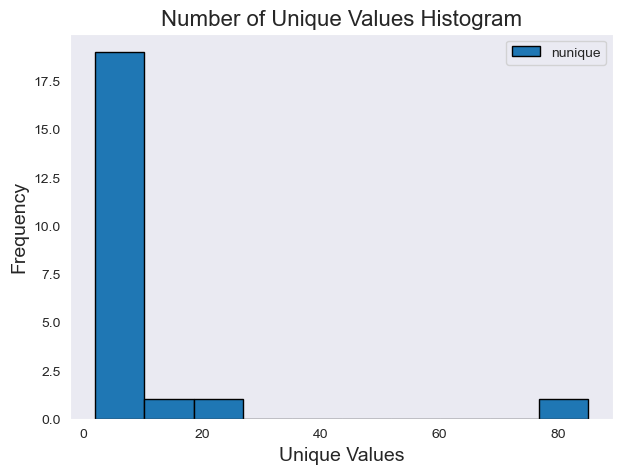

In [16]:
fs.plot_unique()

In [17]:
fs.unique_stats.sample(10)

,nunique
Construction waste,2
Orujillo slag,2
PP Fiber,4
Cl2Mg,3
Vermiculite,4
Coal slag,6
MgSO4,3
MSW ash,2
Ladle slag,3
AlOH3,3


Collinear analysis

In [18]:
fs.identify_collinear(correlation_threshold=0.9, one_hot = True)

0 features with a correlation magnitude greater than 0.90.



In [19]:
#fs.plot_collinear()

#plt.gcf().set_size_inches(4, 4)  
#plt.xticks(fontsize=6)          
#plt.yticks(fontsize=6)          
#plt.tight_layout()              
#plt.show()

In [20]:
correlated_features = fs.ops['collinear']

In [21]:
correlated_features

[]

In [22]:
fs.record_collinear

,drop_feature,corr_feature,corr_value


In [23]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2',
                            n_iterations = 100, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's l2: 4.18863
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's l2: 1.57585
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[993]	valid_0's l2: 0.666782
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[682]	valid_0's l2: 0.469777
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[562]	valid_0's l2: 2.42117
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[650]	valid_0's l2: 3.84144
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's l2: 2.61609
Training until validation scores don't improve for 100 rounds
Early stopping, b

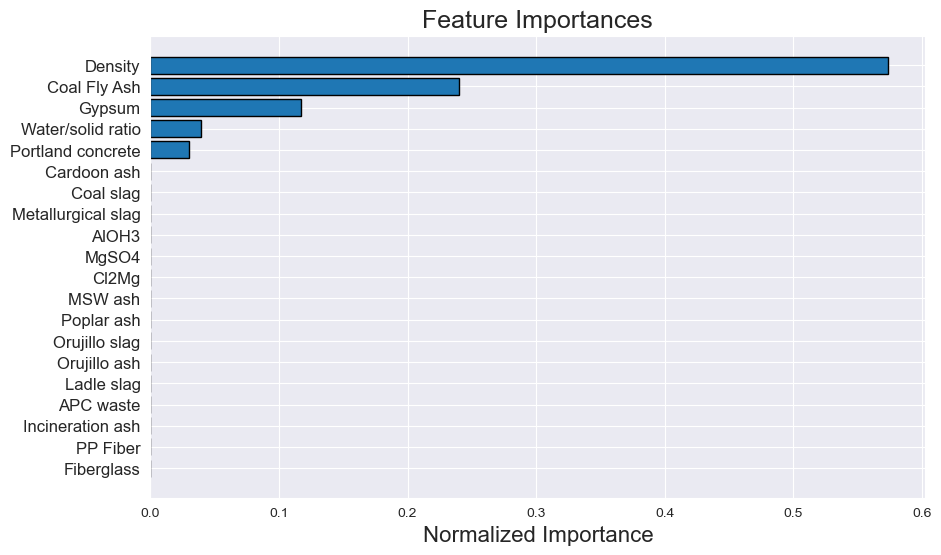

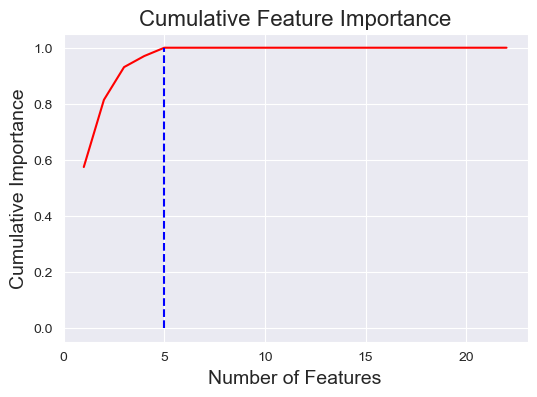

5 features required for 0.99 of cumulative importance


In [24]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [25]:
#df_fs = fs.remove(methods = ['collinear'], keep_one_hot = True)

In [26]:
df_fs.shape

(92, 22)

In [27]:
df_fs.head()

,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,Portland concrete,...,Orujillo ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,0.4,1309.000000,20.0,0.0,0.0,0.0,80,0,0,0.0,...,0,0,0,0,0,0,0.0,0,0,0
1,0.4,1371.000000,20.0,0.0,0.0,0.0,80,0,0,0.0,...,0,0,0,0,0,0,0.0,0,0,0
2,0.4,849.841788,20.0,0.0,0.0,0.0,80,0,0,0.0,...,0,0,0,0,0,0,0.0,0,0,0
3,0.4,1042.269832,20.0,0.0,0.0,0.0,80,0,0,0.0,...,0,0,0,0,0,0,0.0,0,0,0
4,0.4,1050.458259,20.0,0.0,0.0,0.0,80,0,0,0.0,...,0,0,0,0,0,0,0.0,0,0,0


In [28]:
feat_selector = FeatureSelector(modeling_type='regression',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

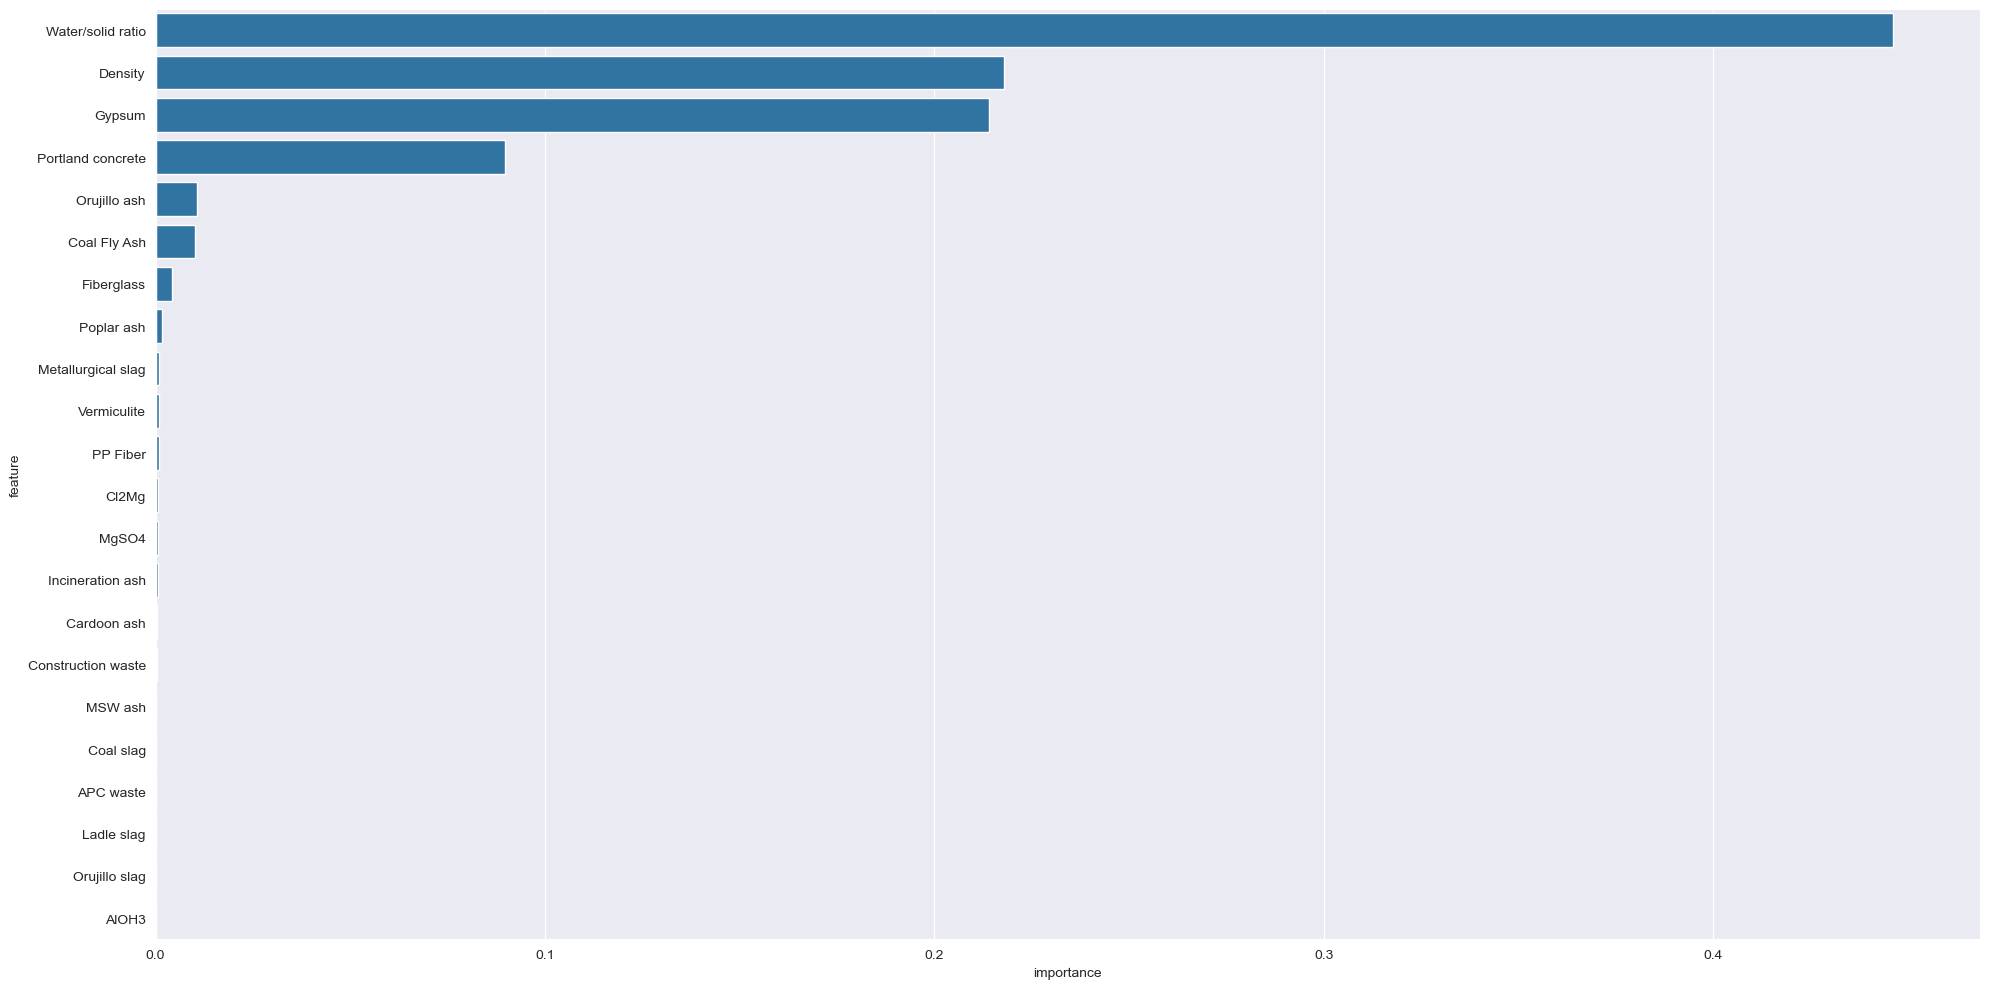

In [29]:
#Train XGB model & return importance results as pd.DataFrame 
xgb_importance_df = feat_selector.xgb_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


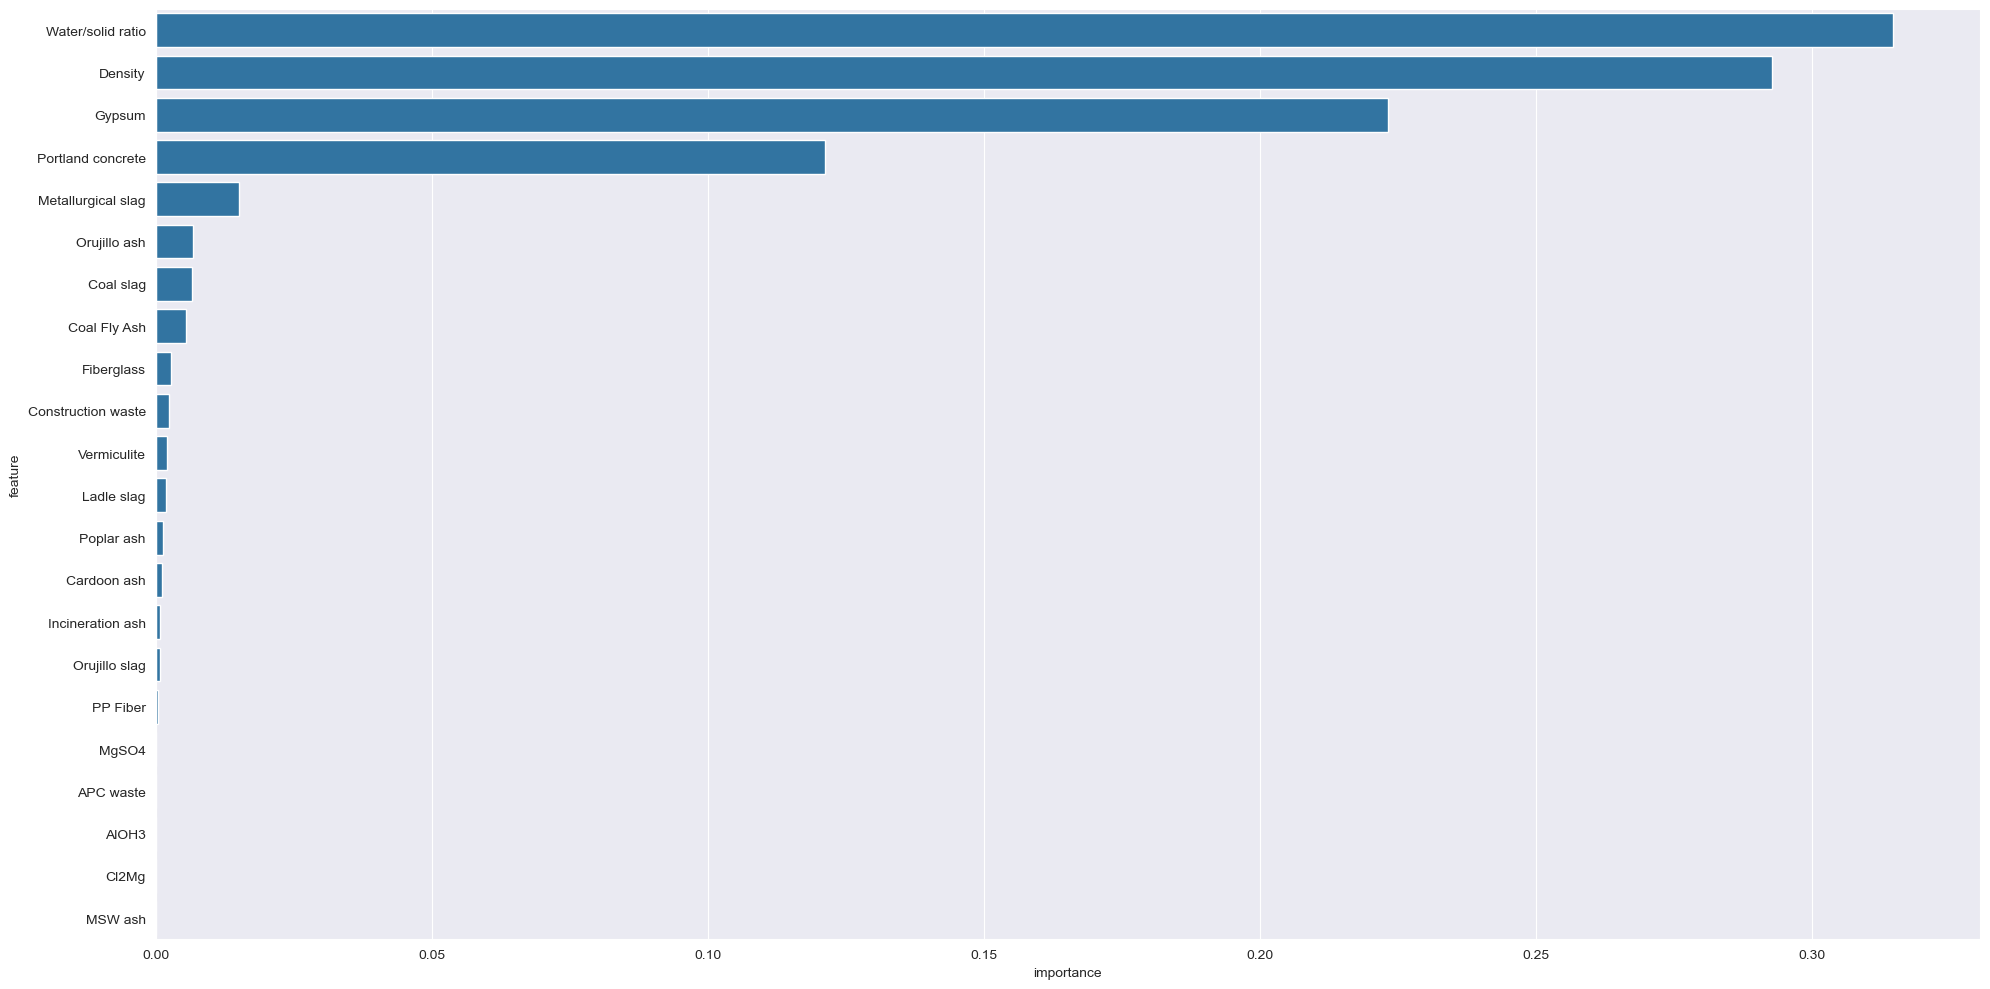

In [30]:
#Train RFR model & return importance results as pd.DataFrame 
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None,
                                                   return_plot=True)


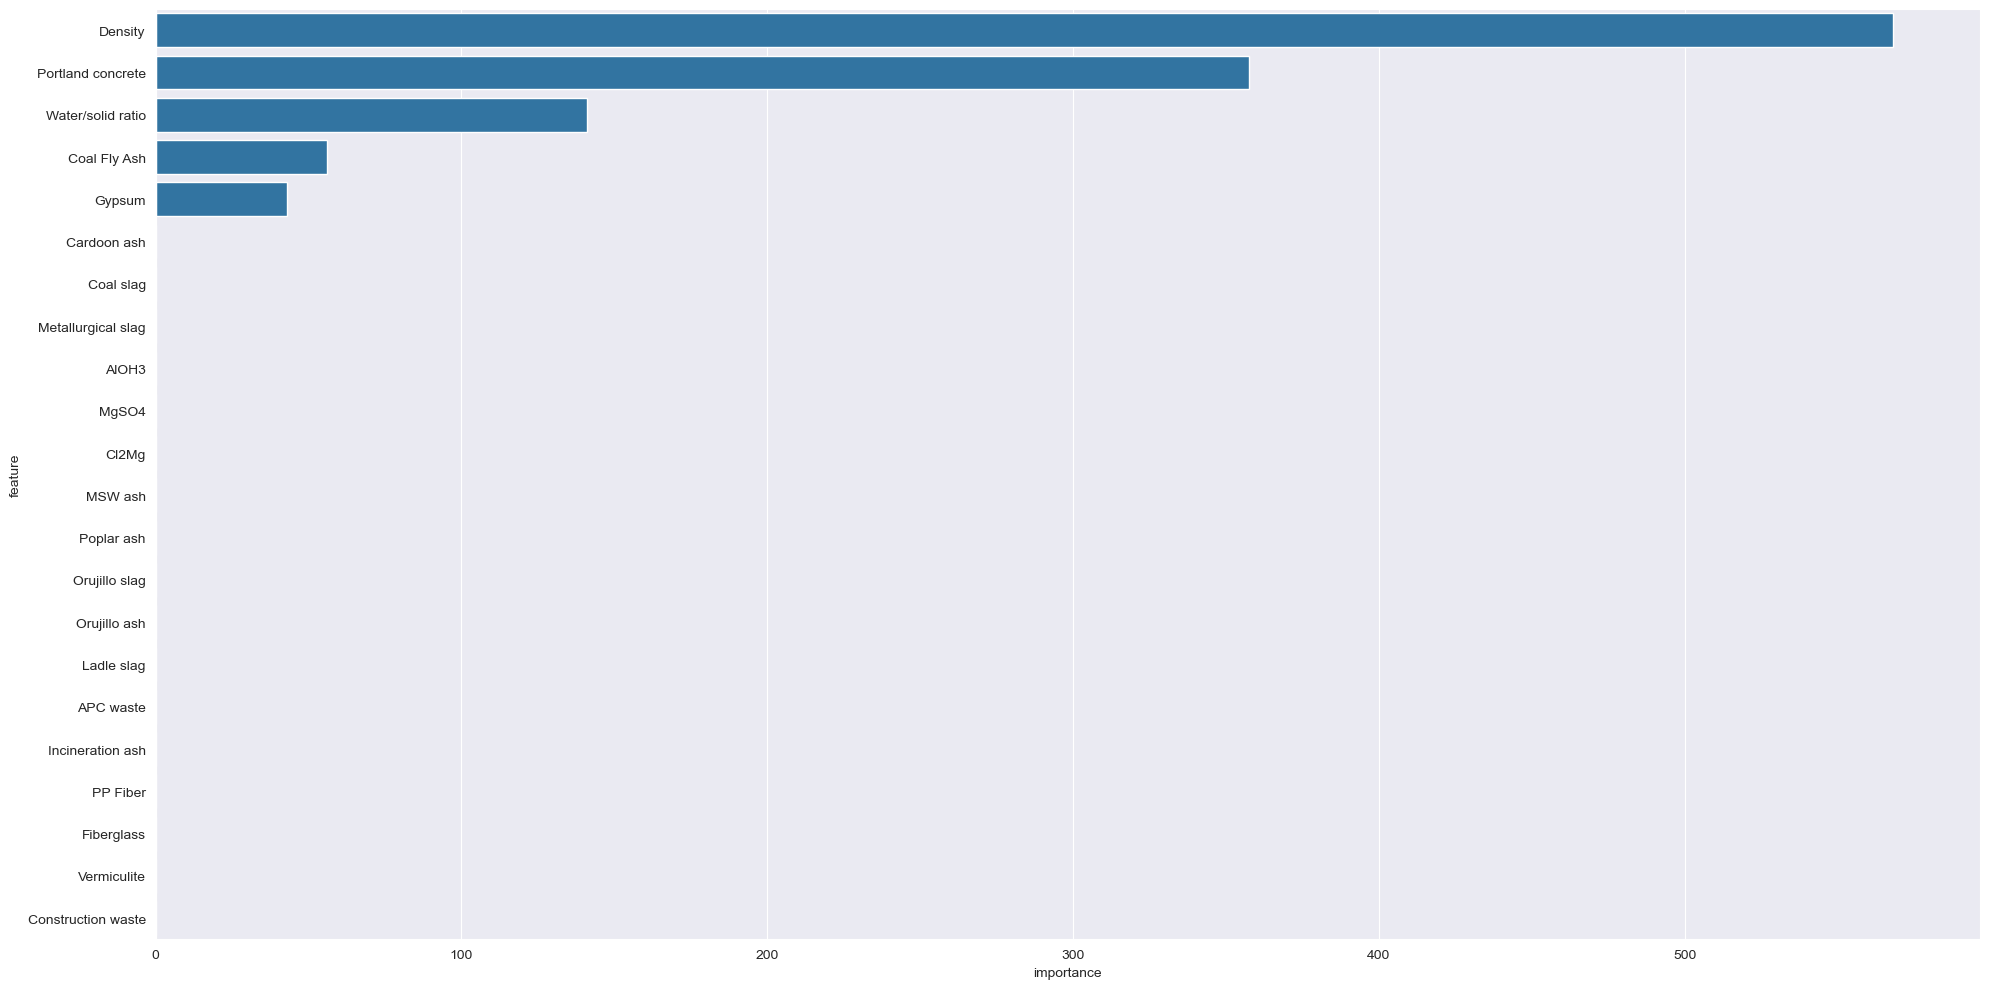

In [31]:
#Train LightGBM model & return importance results as pd.DataFrame 
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


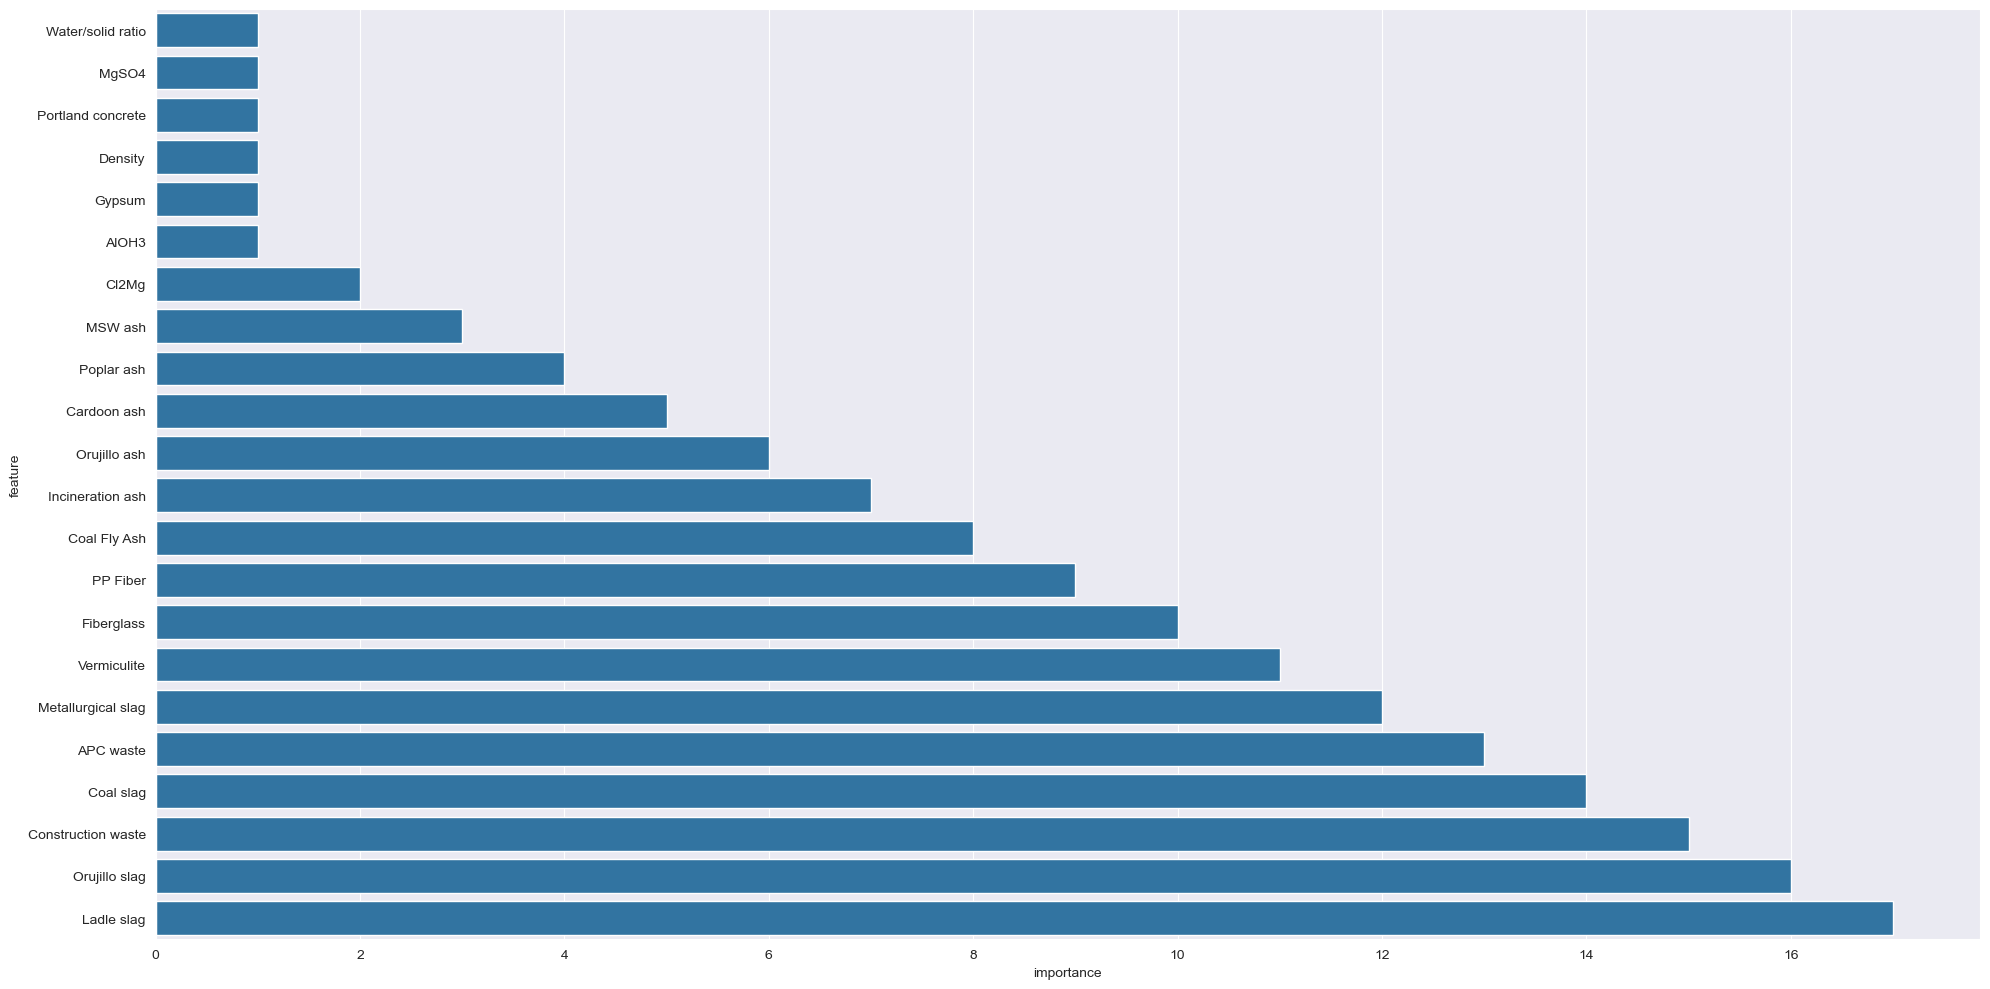

In [32]:
#Apply RFECV with using LightGBM as the estimator & return importance results as pd.DataFrame 
lgbm_hyperparams = {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 400,
                    'num_leaves': 30, 'random_state':24, 'importance_type':'gain'
                   }

rfecv_hyperparams = {'step':1, 'min_features_to_select':6, 'cv':10}

rfecv_importance_df = feat_selector.rfecv_importance(lgbm_hyperparams=lgbm_hyperparams,
                                                     rfecv_hyperparams=rfecv_hyperparams,
                                                     return_plot=True)

In [33]:
#Automated correlation analysis & applying multiple feature selection methods
feat_selector = AutoFeatureSelect(modeling_type='regression',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

final_importance_df = feat_selector.apply_feature_selection(selection_methods=['xgb', 'lgbm', 'rfecv', 'boruta'])

LightGBM Feature Importance is finished
XGBoost Feature Importance is finished
RFECV Feature Importance is finished
Boruta Feature Importance is finished


In [34]:
final_importance_df.sort_values(by = 'xgb_importance', ascending = False)

,feature,lgbm_importance,xgb_importance,rfecv_rankings,boruta_support,boruta_support_weak,boruta_ranking
2,Water/solid ratio,141.132691,0.446136,1,1,0,1
0,Density,568.197728,0.217829,1,1,0,1
4,Gypsum,42.921426,0.213969,3,1,0,1
1,Portland concrete,357.500348,0.089816,1,1,0,1
14,Orujillo ash,0.000000,0.010734,10,0,0,4
3,Coal Fly Ash,56.016709,0.010085,2,0,0,3
19,Fiberglass,0.000000,0.004238,13,0,0,6
12,Poplar ash,0.000000,0.001644,8,0,0,12
7,Metallurgical slag,0.000000,0.000891,15,0,0,2
20,Vermiculite,0.000000,0.000881,14,0,0,8


In [35]:
corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.9,
                                                            cat_threshold=0.9)


In [36]:
corr_features

[]

In [37]:
feat_selector.drop_correlated_features()

In [38]:
def get_feature_lists_by_threshold(df, threshold=0.99):
    accumulated_sum = 0
    include = []
    exclude = []
    
    for index, row in df.iterrows():
        if accumulated_sum + row['xgb_importance'] <= threshold:
            include.append(row['feature'])
            accumulated_sum += row['xgb_importance']
        else:
            exclude.append(row['feature'])
            exclude.extend(df['feature'][index + 1:])
            break
    
    return include, exclude

In [39]:
threshold = 0.99

include, exclude = get_feature_lists_by_threshold(final_importance_df, threshold)

print("Include:", include)
print("Exclude:", exclude)

Include: ['Density', 'Portland concrete', 'Water/solid ratio', 'Coal Fly Ash', 'Gypsum', 'Cardoon ash', 'Coal slag', 'Metallurgical slag', 'AlOH3', 'MgSO4', 'Cl2Mg', 'MSW ash', 'Poplar ash', 'Orujillo slag']
Exclude: ['Orujillo ash', 'Ladle slag', 'APC waste', 'Incineration ash', 'PP Fiber', 'Fiberglass', 'Vermiculite', 'Construction waste']


In [40]:
drop =[]

In [41]:
exclude = list(set(exclude + drop))

In [42]:
df = df.drop(columns = exclude)

In [43]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Coal Fly Ash,Portland concrete,Orujillo slag,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag
0,1.320439,0.4,1309.000000,20.0,80,0.0,0,0,0,0,0,0,0.0,0,0
1,1.320439,0.4,1371.000000,20.0,80,0.0,0,0,0,0,0,0,0.0,0,0
2,0.700407,0.4,849.841788,20.0,80,0.0,0,0,0,0,0,0,0.0,0,0
3,0.953013,0.4,1042.269832,20.0,80,0.0,0,0,0,0,0,0,0.0,0,0
4,0.998941,0.4,1050.458259,20.0,80,0.0,0,0,0,0,0,0,0.0,0,0


Exporting to xlsx file for ML

In [44]:
df.to_excel(path + 'CR_FS.xlsx', index=False)